In [74]:
df = read.csv('Position_Salaries.csv')
df = df[2:3] # no uso el texto
df

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


In [75]:
# estos datos necesitan una regresion polinomica, pero que pasa si le hacemos una lineal simple?
linearRegresion = lm(formula=Salary~.,
                    data = df)
summary(linearRegresion)


Call:
lm(formula = Salary ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


podemos ver que el R-squared esta alejado del 1, asi que comprobamos que los datos no son muy lineales

In [76]:
# ahora hacemos la regresion lineal pero polinomial
# añadimos las columnas con los datos elevados (no es necesaria la columna con 1's, esta la añade solo R)
df$Level2 = df$Level^2
df$Level3 = df$Level^3
regresionPolinomial = lm(formula = Salary ~ .,
                        data = df)
summary(regresionPolinomial)


Call:
lm(formula = Salary ~ ., data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-75695 -28148   7091  29256  49538 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -121333.3    97544.8  -1.244  0.25994   
Level        180664.3    73114.5   2.471  0.04839 * 
Level2       -48549.0    15081.0  -3.219  0.01816 * 
Level3         4120.0      904.3   4.556  0.00387 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50260 on 6 degrees of freedom
Multiple R-squared:  0.9812,	Adjusted R-squared:  0.9718 
F-statistic: 104.4 on 3 and 6 DF,  p-value: 1.441e-05


Ahora vemos que el valor de R-squared esta cercano a 1, asi que es una buena aproximacion

In [77]:
library(ggplot2)

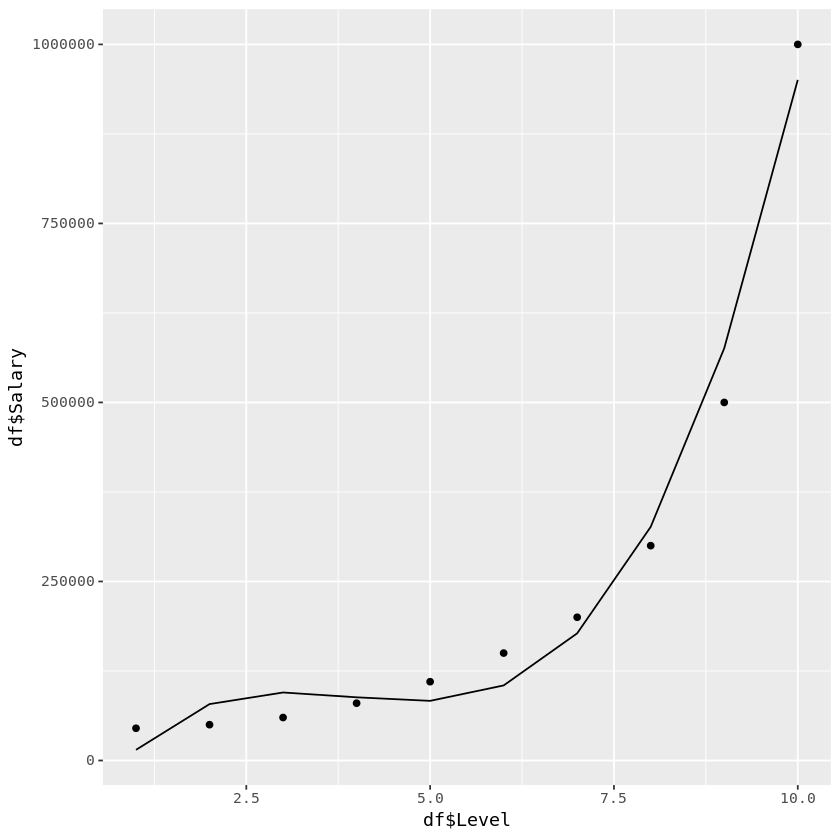

In [78]:
ggplot() +
    geom_point(aes(x = df$Level, y = df$Salary)) +
    geom_line(aes(x = df$Level, y = predict(regresionPolinomial, newdata = df))) +
    theme(text=element_text(family="Mono")) # no me funcionaban las letras, esto solo cambia la font family

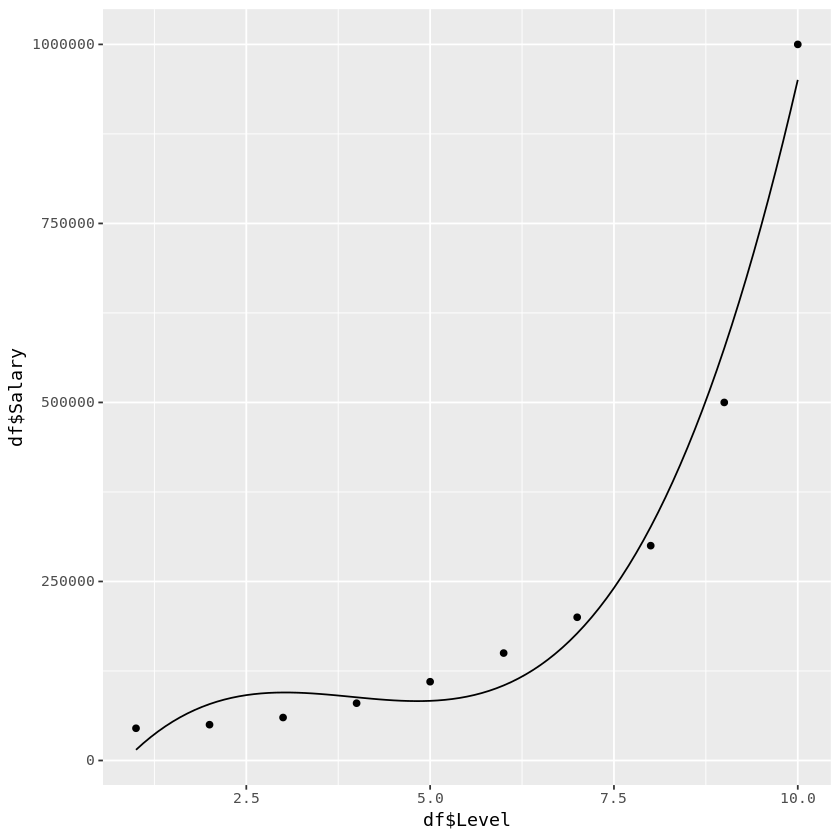

In [79]:
grid = seq(min(df$Level), max(df$Level), 0.1)
ggplot() +
    geom_point(aes(x = df$Level, y = df$Salary)) +
    geom_line(aes(x = grid, y = predict(regresionPolinomial, 
                                        newdata = data.frame(Level=grid,
                                                            Level2 = grid^2,
                                                            Level3 = grid^3)))) +
    theme(text=element_text(family="Mono")) # no me funcionaban las letras, esto solo cambia la font family